In [1]:
# Set up MEEP, taken from Måns template
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.9.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.9.0-0-Linux-x86_64.sh
!bash Miniconda3-py310_23.9.0-0-Linux-x86_64.sh -b -u -f -p /usr/local
!echo "update miniconda"
!conda update --channel defaults --all --yes
!echo "install MEEP"
!conda install -y -c chogan -c conda-forge pymeep --yes
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

from IPython.display import clear_output
clear_output()

import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video

In [2]:
domain = [0, 25, -20, 20]
center = mp.Vector3(
    (domain[1] + domain[0]) / 2,
    (domain[3] + domain[2]) / 2,
)
cell_size = mp.Vector3(
    domain[1] - domain[0],
    domain[3] - domain[2],
)

screen_position = 10
screen_thickness = 0.5
slit_width = 0.5
inner_screen_len = 3
outer_screen_len = (
    cell_size[1]
    - 2*slit_width
    - inner_screen_len
    ) / 2


material = mp.Medium(epsilon=1e9)
geometry = [
    mp.Block(
        mp.Vector3(screen_thickness, outer_screen_len, mp.inf),
        center=mp.Vector3(
            screen_position,
            domain[3] - outer_screen_len / 2),
        material=material),
    mp.Block(
        mp.Vector3(screen_thickness, outer_screen_len, mp.inf),
        center=mp.Vector3(
            screen_position,
            domain[2] + outer_screen_len / 2),
        material=material),
    mp.Block(
        mp.Vector3(screen_thickness, inner_screen_len, mp.inf),
        center=mp.Vector3(screen_position, 0),
        material=material),
    ]

# Perfectly matched layer of thickness 1
pml_thickness = 1
pml_layers = [mp.PML(pml_thickness)]

In [3]:
incoherent_wavelength_band = [0.3, 0.7]
coherent_wavelength = (incoherent_wavelength_band[0] + incoherent_wavelength_band[1]) / 2

def coherent_source():
    return [mp.Source(
      src=mp.ContinuousSource(
          wavelength=coherent_wavelength,
          is_integrated=True,
          ),
      component=mp.Ez,
      center=mp.Vector3(pml_thickness + domain[0], (domain[2]+domain[3])/2, 0),
      size=mp.Vector3(y=cell_size[1]),
    )]

def incoherent_source(n_sources=250):
    return [mp.Source(
      src=mp.ContinuousSource(
          wavelength=np.random.uniform(incoherent_wavelength_band[0], incoherent_wavelength_band[1]),
          is_integrated=True,
          ),
      component=mp.Ez,
      center=mp.Vector3(pml_thickness + domain[0], 0, 0) + mp.Vector3(np.random.rand()*0.05*cell_size[0], 2*(np.random.rand()-0.5) * (cell_size[1]/2 - pml_thickness)),
      amp_func=gaussian,
      ) for i in range(n_sources)]

     block, center = (10,11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,-11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,0,0)
          size (0.5,3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)


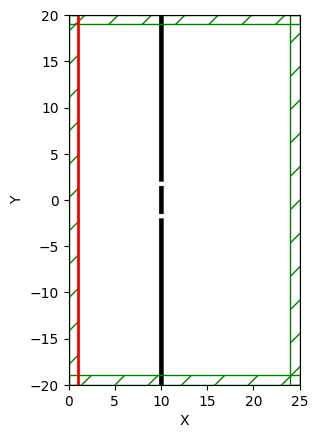

-----------
Initializing structure...
time for choose_chunkdivision = 0.000943899 s
Working in 2D dimensions.
Computational cell is 25 x 40 x 0 with resolution 34
     block, center = (10,11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,-11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,0,0)
          size (0.5,3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
time for set_epsilon = 2.12659 s
-----------


FloatProgress(value=0.0, description='0% done ', max=175.0)

     block, center = (10,11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,-11,0)
          size (0.5,18,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
     block, center = (10,0,0)
          size (0.5,3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1e+09,1e+09,1e+09)
Meep progress: 1.5147058823529411/175.0 = 0.9% done in 4.0s, 459.5s to go
on time step 103 (time=1.51471), 0.0389014 s/step
Meep progress: 3.2058823529411766/175.0 = 1.8% done in 8.0s, 429.5s to go
on time step 218 (time=3.20588), 0.0348557 s/step
Meep progress: 5.0588235294117645/175.0 = 2.9% done in 12.0s, 403.8s to go
on time step 345 (time=5.07353), 0.0315842 s/step
Meep progress: 7.0/175.0 = 4.0% done in 16.1s, 386.0s to go
on time step 476 (time=7), 0.030905 s/step
Meep progres

In [4]:
import moviepy.editor

# Determine resolution needed to discretize the smallest defined length (shortest wavelength of incoherent source) with 10 FD points
pixel_count = 10
resolution = int(np.ceil(pixel_count / incoherent_wavelength_band[0]))

sim = mp.Simulation(
    cell_size=cell_size,
    geometry_center=center,
    sources=coherent_source(),
    boundary_layers=pml_layers,
    geometry=geometry,
    resolution=resolution,
    force_complex_fields=False,
    )

# Plot domain & sources
sim.plot2D()
plt.show()



f = plt.figure(dpi=150)

def field_func(x):
  intensity = x**2
  return np.log(intensity + 1)
  # return x

field_params = {'cmap':'Blues', 'field_function':field_func}

Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, field_parameters=field_params)

intensity_sum = [None]
def record_E(sim):
  if intensity_sum[0] is None:
    intensity_sum[0] = sim.get_array(component=mp.Ez)**2
  else:
    intensity_sum[0] += sim.get_array(component=mp.Ez)**2


sim.run(mp.at_every(0.5, Animate), mp.after_time(cell_size[0], record_E), until=cell_size[0] + 150)
plt.close()


filename = "intensity_animation.mp4"
fps = 6
Animate.to_mp4(fps, filename)
moviepy.editor.ipython_display(filename)

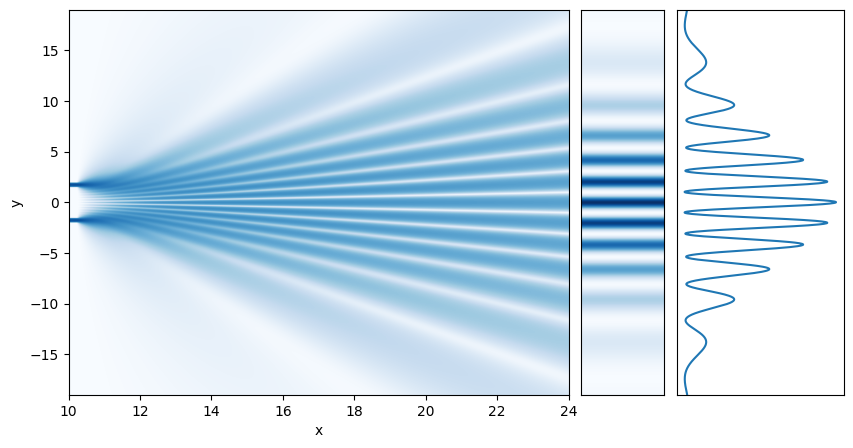

In [5]:
# Plot intensity up to a constant factor (~E^2)
screen_idx_x = int((screen_position - domain[0]) / (domain[1] - domain[0]) * intensity_sum[0].shape[0])
end_idx_x_reverse = int( 1 / (domain[1] - domain[0]) * intensity_sum[0].shape[0])
data = intensity_sum[0]
log_data = np.log(data+1)

# Plot field right of screen
fig, axs = plt.subplots(1,3, figsize=(10,5), width_ratios=[6, 1, 2])
axs[0].imshow(log_data.T, cmap="Blues", extent=domain)
axs[0].set_xlim(screen_position, domain[1]-pml_thickness)
axs[0].set_ylim(domain[2]+pml_thickness, domain[3]-pml_thickness)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_aspect("auto")

# Plot vertical slice just before right boundary
axs[1].imshow(np.tile(data[-end_idx_x_reverse,:], [1,1]).T, cmap="Blues", extent=[0,1,domain[2], domain[3]], vmin=0)
axs[1].set_ylim(domain[2]+pml_thickness, domain[3]-pml_thickness)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_aspect("auto")

axs[2].plot(data[-end_idx_x_reverse,::-1], np.linspace(domain[2], domain[3], data.shape[1]))
axs[2].set_ylim(domain[2]+pml_thickness, domain[3]-pml_thickness)
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.subplots_adjust(wspace=0.05, hspace=0)

plt.show()